Przykładowe wartości cech:
 [[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]]
Przykładowe kwoty:  [24.  21.6 34.7 33.4]
Elementy zbioru:  ['data', 'target', 'feature_names', 'DESCR', 'filename']
Klucze dostępne w zbiorze danych:  dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Num

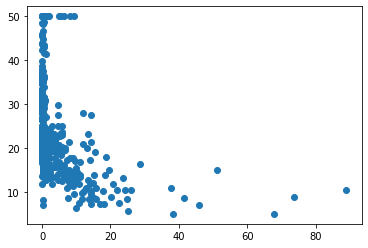

Metryka domyślna:  0.10618676242563296
Metryka r2:  0.10618676242563296
Współczynniki regresji:
 [-0.49443329]


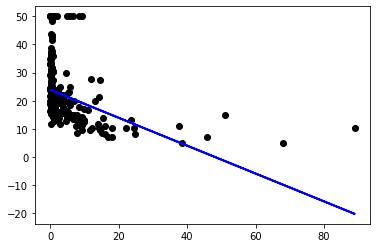

[-0.08001604  0.00846094 -0.70530959  0.12080509 -0.94163309]
[ 0.03110287  0.01794374 -0.00416359  0.14110162 -0.17542373]
[ -37.29856463  -90.26649703 -136.57347572  -77.11581342  -51.62475583]
[-19.35478866 -27.0063431  -27.91769175 -29.73451726 -17.94168284]


In [1]:
# Zadanie 1
# Wybierz inną cechę i spróbuj przewidzieć ceny mieszkań. Użyj walidacji krzyżowej.
# Zadanie bonus: zaimportuj dane nt cukrzycy przy pomocy funkcji load_diabetes
# Następnie przeanalizuj dane i zaproponuj regresor liniowy. Sprawdź jakość modelu za pomocą walidacji krzyżowej.

from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

%matplotlib inline

# Loading a set of property features and their prices
boston_property = load_boston()
boston_list = pd.DataFrame(boston_property['data'], columns=boston_property['feature_names'])

# appending price information to the rest of the dataframe
boston_list['target'] = np.array(list(boston_property['target']))


print('Przykładowe wartości cech:\n', boston_property.data[:4])
print('Przykładowe kwoty: ', boston_property.target[:4])


print('Elementy zbioru: ', list(boston_property.keys()))
print('Klucze dostępne w zbiorze danych: ', boston_property.keys())
print(boston_property.DESCR)

#Downloading crime
crime = boston_property['data'][:, np.newaxis, 0]
plt.scatter(crime, boston_property['target'])
plt.show()


# Creation of a linear regressor
linreg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(crime, boston_property['target'], test_size = 0.5)

linreg.fit(X_train, y_train)

# predicting crime in the city per person
y_pred = linreg.predict(X_test)

# default metric
print('Metryka domyślna: ', linreg.score(X_test, y_test))

# indicator (metric) r ^ 2
# documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score
print('Metryka r2: ', r2_score(y_test, y_pred))

# regression coefficients
print('Współczynniki regresji:\n', linreg.coef_)

# Regression graph
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.show()

cv_score_r2 = cross_val_score(linreg, crime, boston_property.target, cv=5, scoring='r2')
print(cv_score_r2)

# we use a different metric
# documentation:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
cv_score_ev = cross_val_score(linreg, crime, boston_property.target, cv=5, scoring='explained_variance')
print(cv_score_ev)

# and another one
cv_score_mse = cross_val_score(linreg, crime, boston_property.target, cv=5, scoring='neg_mean_squared_error')
print(cv_score_mse)


max_error = cross_val_score(linreg, crime, boston_property.target, cv=5, scoring='max_error')
print(max_error)

Elementy zbioru:  ['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename']
Klucze dostępne w zbiorze danych:  dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have 

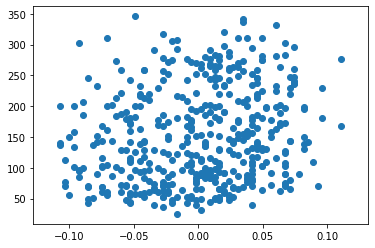

Metryka domyślna:  0.027902318993950015
Metryka r2:  0.027902318993950015
Współczynniki regresji:
 [327.46470647]


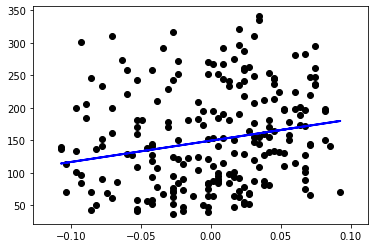

[-0.05439031 -0.01198372 -0.01562396  0.07293105  0.04727714]
[ 0.0146825   0.02668767 -0.01321893  0.0738942   0.05100268]
[-5138.32232857 -6420.46317189 -6356.36843802 -4863.65224943
 -6164.79356774]
[-176.48716234 -182.40259446 -210.49491793 -164.7705303  -164.34680909]


In [2]:
#zadanie bonus
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


%matplotlib inline
#Loading diabetics collection
diabetics = load_diabetes()


diabetics_list = pd.DataFrame(diabetics['data'], columns=diabetics['feature_names'])

diabetics_list['target'] = np.array(list(diabetics['target']))

print('Elementy zbioru: ', list(diabetics.keys()))
print('Klucze dostępne w zbiorze danych: ', diabetics.keys())
print(diabetics.DESCR)


#Download of diabetics
wiek = diabetics['data'][:, np.newaxis, 0]
plt.scatter(wiek,diabetics['target'])
plt.show()


# Creation of a linear regressor
linreg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(wiek, diabetics['target'], test_size = 0.5)

linreg.fit(X_train, y_train)

# predicting diabetes by age
y_pred = linreg.predict(X_test)

# default metric
print('Metryka domyślna: ', linreg.score(X_test, y_test))

# indicator (metric) r ^ 2
# documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score
print('Metryka r2: ', r2_score(y_test, y_pred))

# regression coefficients
print('Współczynniki regresji:\n', linreg.coef_)

# Regression graph
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.show()

cv_score_r2 = cross_val_score(linreg, wiek, diabetics.target, cv=5, scoring='r2')
print(cv_score_r2)

# we use a different metric
# documentation:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
cv_score_ev = cross_val_score(linreg, wiek, diabetics.target, cv=5, scoring='explained_variance')
print(cv_score_ev)

# and another one
cv_score_mse = cross_val_score(linreg, wiek, diabetics.target, cv=5, scoring='neg_mean_squared_error')
print(cv_score_mse)


max_error = cross_val_score(linreg, wiek, diabetics.target, cv=5, scoring='max_error')
print(max_error)
